In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

In [28]:
df=pd.read_excel('C:\\Users\\nafissaad\\Tutorial\\My projects\\Econometric 465 Assignment 1\\Untitled.xlsx')

In [29]:
df

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


In [30]:
df[['salary','sales']].describe()

,salary,sales
count,209.000000,209.000000
mean,1281.119617,6923.793282
std,1372.345308,10633.271088
min,223.000000,175.199997
25%,736.000000,2210.300049
50%,1039.000000,3705.199951
75%,1407.000000,7177.000000
max,14822.000000,97649.898438


In [31]:
df.sales.var()

113066454.03946956

In [32]:
df.sales.skew()#possitive skewness Right skeewed 

5.035335733115776

In [33]:
df.salary.skew()#possitive skewness Right skeewed 

6.904576803226618

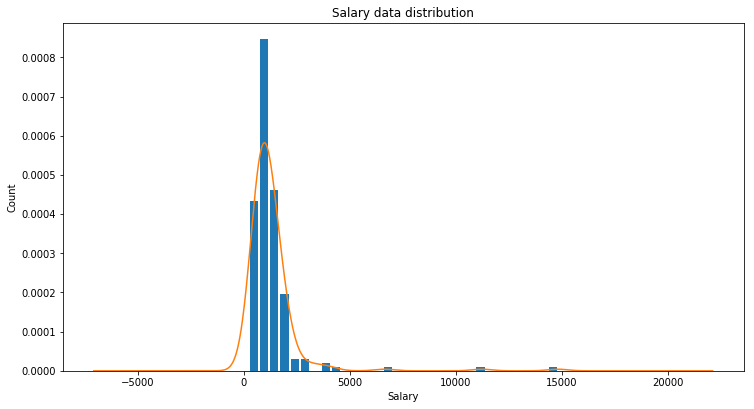

In [34]:
plt.figure(figsize=(12.2,6.4))
plt.hist(df.salary,bins=30,rwidth=0.8,density=True,)
df['salary'].plot(kind = 'density')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary data distribution')
plt.show()

In [35]:
x=df.salary
y=df.sales

In [36]:
Test=pd.DataFrame(data={
    'values':[0,2000,4000,6000,8000,10000,12000,14000],
})
Test

,values
0,0
1,2000
2,4000
3,6000
4,8000
5,10000
6,12000
7,14000


In [37]:
x=df.salary
y=df.sales
y2=sm.add_constant(y)
model=sm.OLS(x,y2).fit()
reg= linear_model.LinearRegression()
mod=reg.fit(df[['salary']].values,df['sales'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.018
Date:                Fri, 01 Jul 2022   Prob (F-statistic):             0.0838
Time:                        21:27:38   Log-Likelihood:                -1804.4
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1174.0049    112.813     10.407      0.000     951.596    1396.414
sales          0.0155      0.009      1.737      0.084      -0.002       0.033
==============================================================================
Omnibus:                      315.565   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33496.452
Skew:                           7.076   Prob(JB):                         0.00
Kurtosis:                      63.384   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
a=1174.0049
b=0.0155
x1=4000
y1=a+b*x1
y1

1236.0049

In [39]:
model.predict([1,4000])

array([1235.88698779])

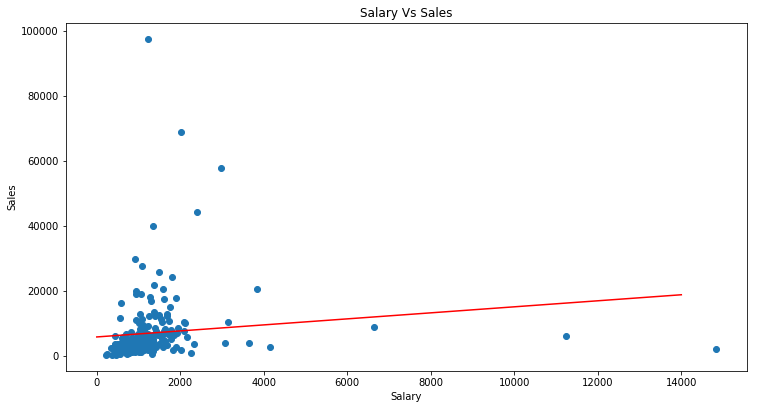

In [40]:
plt.figure(figsize=(12.2,6.4))
plt.scatter(x=x,y=y)
plt.plot(np.array(Test.values),mod.predict(Test.values),color='red')
plt.xlabel('Salary')
plt.ylabel('Sales')
plt.title('Salary Vs Sales')
plt.show()

In [41]:
#Given
IQR_for_salary=14
IQR_for_sales=15

In [42]:
#for salary
Q1=df.salary.quantile(0.25)
Q2=df.salary.quantile(0.75)
Q1,Q2

(736.0, 1407.0)

In [43]:
lower_limit_salary =Q1-1.5*IQR_for_salary
upper_limit_salary =Q2+1.5*IQR_for_salary
lower_limit_salary,upper_limit_salary

(715.0, 1428.0)

In [44]:
#for sales
#for salary
Q3=df.sales.quantile(0.25)
Q4=df.sales.quantile(0.75)
Q3,Q4

(2210.300048828125, 7177.0)

In [45]:
lower_limit_sales =Q3-1.5*IQR_for_sales
upper_limit_sales =Q4+1.5*IQR_for_sales
lower_limit_sales,upper_limit_sales

(2187.800048828125, 7199.5)

In [46]:
len(df['salary'][(df.salary<lower_limit_salary)|(df.salary>upper_limit_salary)])

95

In [47]:
len(df['sales'][(df.sales<lower_limit_sales)|(df.salary>upper_limit_sales)])

53

In [48]:
#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

#calculate Coefficient of variation for each column in data frame
print(df[['roe','ros']].apply(cv))
print('ROE is more consistant than ROS')

roe     49.571720
ros    110.312021
dtype: float64
ROE is more consistant than ROS


In [49]:
df.roe.std()/df.roe.mean()

0.4957171966958476

In [50]:
df.ros.std()/df.ros.mean()

1.1031202130603828